# Independent Study Jun 2023

### Single Layer Perceptron

[Kaggle Learn - Computer Vision](https://www.kaggle.com/learn/computer-vision)

In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt

def showImg(imgTf, plotIndex, title):
    plt.subplot(2, 4, plotIndex)
    plt.title(title)
    plt.axis('off')
    #reformat tensorflow image for pyplot
    plt.imshow(tf.squeeze(imgTf))

moon = tf.io.read_file('moon.jpg')
moon = tf.io.decode_jpeg(moon, channels=1)
moon = tf.image.resize(moon, size=[1080, 1080])
car = tf.io.read_file('car_illus.jpg')
car = tf.io.decode_jpeg(car, channels=1)
car = tf.image.resize(car, size=[400, 400])

In [83]:
#kernals
class kernels():
    def __init__(self):
        self.edgeDetect = tf.constant([
            [-1, -1, -1],
            [-1, 8, -1],
            [-1, -1, -1]
        ])
        self.edgeDetect = tf.reshape(self.edgeDetect, [*self.edgeDetect.shape, 1, 1])
        self.edgeDetect = tf.cast(self.edgeDetect, dtype=tf.float32)

        self.bottomSobel = tf.constant([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]
        ])
        self.bottomSobel = tf.reshape(self.bottomSobel, [*self.bottomSobel.shape, 1, 1])
        self.bottomSobel = tf.cast(self.bottomSobel, dtype=tf.float32)

        self.emboss = tf.constant([
            [-2, -1, 0],
            [-1, 1, 1],
            [0, 1, 2]
        ])
        self.emboss = tf.reshape(self.emboss, [*self.emboss.shape, 1, 1])
        self.emboss = tf.cast(self.emboss, dtype=tf.float32)

        self.sharpen = tf.constant([
            [0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]
        ])
        self.sharpen = tf.reshape(self.sharpen, [*self.sharpen.shape, 1, 1])
        self.sharpen = tf.cast(self.sharpen, dtype=tf.float32)

conv2d kernal looks like
 tf.Tensor(
[[[[-1.]]

  [[-1.]]

  [[-1.]]]


 [[[-1.]]

  [[ 8.]]

  [[-1.]]]


 [[[-1.]]

  [[-1.]]

  [[-1.]]]], shape=(3, 3, 1, 1), dtype=float32)
conv2d kernal looks like
 tf.Tensor(
[[[[-1.]]

  [[-1.]]

  [[-1.]]]


 [[[-1.]]

  [[ 8.]]

  [[-1.]]]


 [[[-1.]]

  [[-1.]]

  [[-1.]]]], shape=(3, 3, 1, 1), dtype=float32)


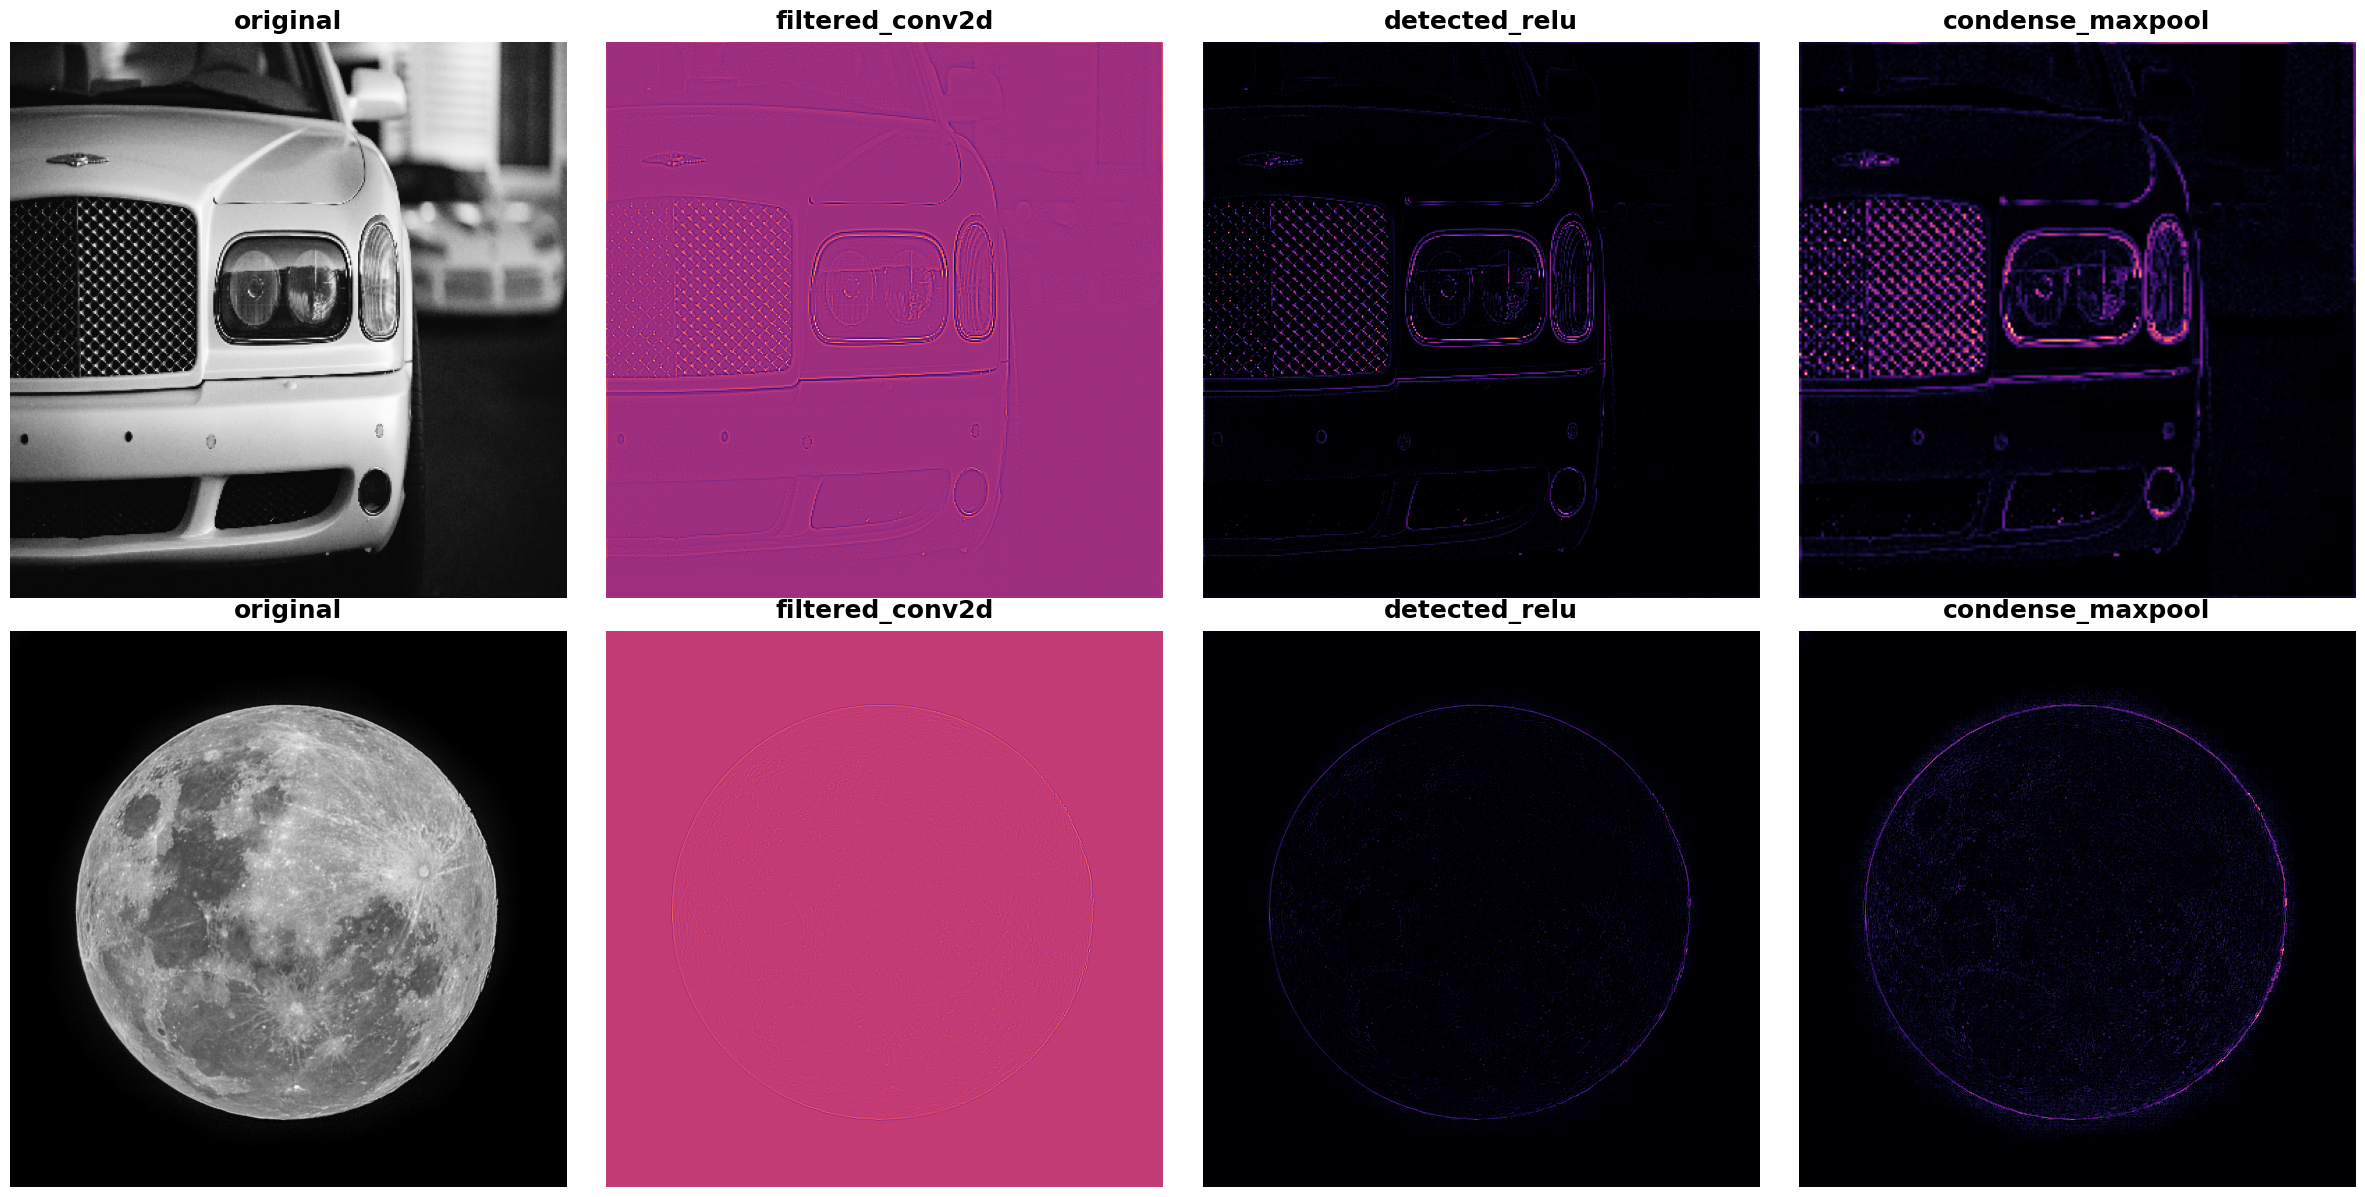

In [84]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 4, 1)
plt.title('original')
plt.axis('off')
plt.imshow(tf.squeeze(car).numpy(), cmap='gray')
kernel = kernels()

plt.subplot(2, 4, 5)
plt.title('original')
plt.axis('off')
plt.imshow(tf.squeeze(moon).numpy(), cmap='gray')
kernel = kernels()

#reformatting
car = tf.image.convert_image_dtype(car, dtype=tf.float32)
car = tf.expand_dims(car, axis=0)
moon = tf.image.convert_image_dtype(moon, dtype=tf.float32)
moon = tf.expand_dims(moon, axis=0)

#filter = conv2d
print('conv2d kernal looks like\n', kernel.edgeDetect)
car_imgFilter = tf.nn.conv2d(
    input=car,
    filters=kernel.edgeDetect,
    strides=1,
    padding='SAME',
)
showImg(car_imgFilter, 2, 'filtered_conv2d')
print('conv2d kernal looks like\n', kernel.edgeDetect)
moon_imgFilter = tf.nn.conv2d(
    input=moon,
    filters=kernel.edgeDetect,
    strides=1,
    padding='SAME',
)
showImg(moon_imgFilter, 6, 'filtered_conv2d')

#detect = relu
car_imgDetect = tf.nn.relu(car_imgFilter)
showImg(car_imgDetect, 3, 'detected_relu')
moon_imgDetect = tf.nn.relu(moon_imgFilter)
showImg(moon_imgDetect, 7, 'detected_relu')

#condense = maxpool
car_imgCondense = tf.nn.pool(
    input=car_imgDetect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME'
)
showImg(car_imgCondense, 4, 'condense_maxpool')
moon_imgCondense = tf.nn.pool(
    input=moon_imgDetect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME'
)
showImg(moon_imgCondense, 8, 'condense_maxpool')

plt.show()